# Introduction

This notebook reflects my interest in exploring machine learning techniques that merge the capabilities of artificial intelligence with chemical engineering. Soft sensors are valuable tools used to model process variables that cannot be measured directly with physical sensors. They provide real-time estimations based on other available data, enhancing process monitoring and control. In this notebook, the focus is on predicting the concentration of a chemical component—a variable that often lacks direct measurement capabilities in industrial environments.

# Libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data generation

In [26]:
# Simulated Data Generation
np.random.seed(42)
flow_rate = np.random.normal(100, 10, 1000)
temperature = np.random.normal(75, 5, 1000)
pressure = np.random.normal(3, 0.3, 1000)

# Target variable: concentration
concentration = 0.5 * flow_rate + 0.3 * temperature - 0.2 * pressure + np.random.normal(0, 5, 1000)

df = pd.DataFrame({
    'flow_rate': flow_rate,
    'temperature': temperature,
    'pressure': pressure,
    'concentration': concentration
})

In [28]:
df.head()

,flow_rate,temperature,pressure,concentration
0,104.967142,81.996777,2.797447,66.984077
1,98.617357,79.623168,2.956644,68.302375
2,106.476885,75.298152,2.762274,73.207406
3,115.230299,71.765316,2.907612,88.001660
4,97.658466,78.491117,2.431916,74.672951


# Data visualization

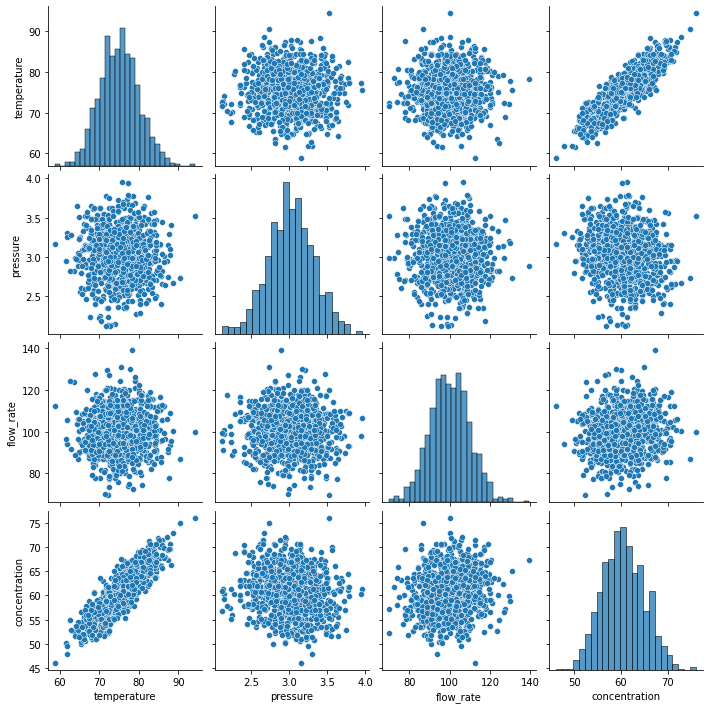

In [11]:
sns.pairplot(df)
plt.show()

# Model generation

## Preprocessing

Our concern is to model the relationships between the features (temperature, pressure and flow rate) and the target variable (concentration) in the dataset.

In [12]:
X = df[['temperature', 'pressure', 'flow_rate']]
y = df['concentration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Support Vector Regression (SVR)

In [35]:
# Initializing the SVR model

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

SVR()

In [36]:
y_pred_svr=svr_model.predict(X_test)

## Random Forest Regressor

In [32]:
# Initializing the Random Forest Regression model with 10 decision trees
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fitting the Random Forest Regression model to the data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Predicting the target values of the test set
y_pred_rf = rf_model.predict(X_test)

## Linear Regression

In [29]:
# Fitting the Linear Regression model to the data
lr_model = LinearRegression().fit(X_train, y_train)

In [33]:
# Predicting the target values of the test set
y_pred_lr = lr_model.predict(X_test)

# Model evaluation

In [37]:
# Function to obtain metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R²: {r2:.2f}")

In [38]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")

Linear Regression - MSE: 4.30, R²: 0.77
Random Forest - MSE: 5.10, R²: 0.72
Support Vector Regressor - MSE: 5.36, R²: 0.71


## Visualization

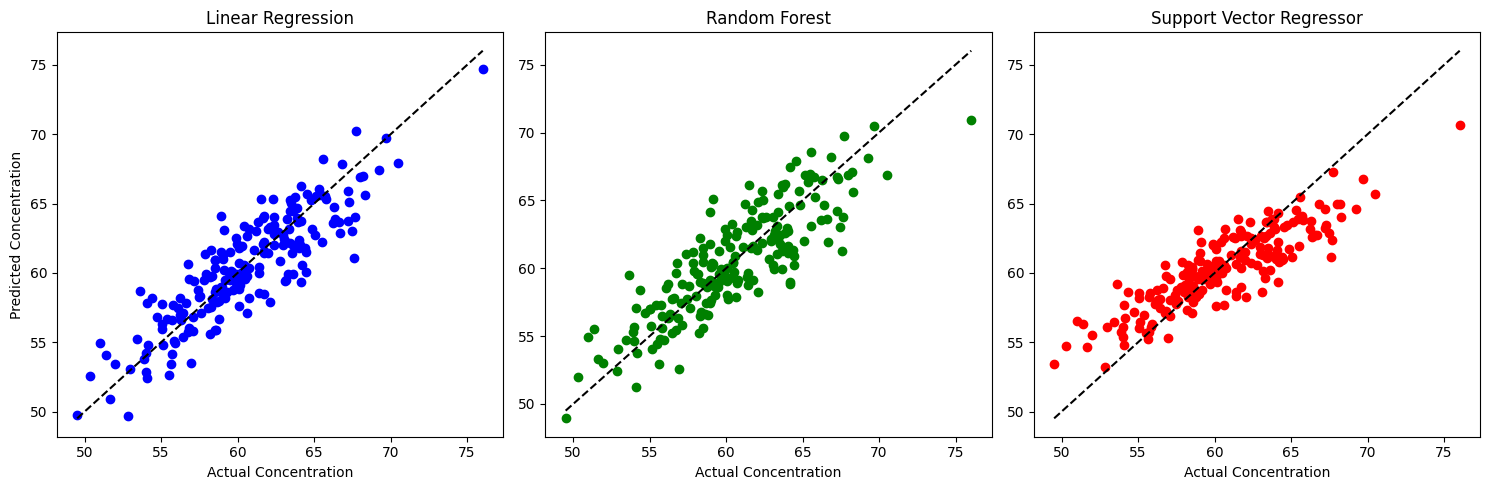

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Linear Regression')
plt.xlabel('Actual Concentration')
plt.ylabel('Predicted Concentration')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Random Forest')
plt.xlabel('Actual Concentration')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_svr, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Support Vector Regressor')
plt.xlabel('Actual Concentration')

plt.tight_layout()
plt.show()


# Conclusion

In this notebook, I developed a soft sensor using three different machine learning models: Linear Regression, Random Forest Regressor, and Support Vector Regressor.

The comparison of these models shows that:
- **Linear Regression** achieved the best performance with the lowest Mean Squared Error (MSE) of 4.30 and the highest R² score of 0.77, indicating strong predictive accuracy.
- **Random Forest Regressor** had a slightly higher MSE of 5.10 and an R² of 0.72, showing good performance but less effective than Linear Regression.
- **Support Vector Regressor** resulted in the highest MSE of 5.36 and the lowest R² score of 0.71, making it the least accurate model in this case.

**Recommendations for Next Steps:**
1. **Feature Engineering:** Incorporate additional process variables or interaction terms to enhance model accuracy.
2. **Hyperparameter Tuning:** Optimize the Random Forest and SVR models to potentially reduce errors and improve R² scores.
3. **Cross-Validation:** Implement k-fold cross-validation for more robust model evaluation.
4. **Real-World Testing:** Validate the models with real industrial process data to assess their performance under actual operating conditions.
5. **Deployment Considerations:** Explore integration with real-time industrial data systems for practical implementation.

This exploration highlights my enthusiasm for combining artificial intelligence techniques with engineering principles to solve real-world industrial challenges and drive innovation in smart manufacturing.